In [4]:
#convert txt to csv 

import pandas as pd

M = 10                         # Aqui deve ser colocado o valor maxido de threads usado
N = 45                      # quantas vezes executou o programa


def txt_to_dataframe(txt_file, m, n):
    """
    Converte um arquivo TXT em um DataFrame do pandas com m colunas e n linhas por coluna.
    
    :param txt_file: Caminho para o arquivo TXT de entrada.
    :param m: Número de colunas no DataFrame.
    :param n: Número de linhas por coluna no DataFrame.
    :return: Um DataFrame do pandas.
    """
    # Ler os números do arquivo TXT
    with open(txt_file, 'r') as file:
        numbers = [line.strip() for line in file.readlines()]
    
    # Verificar se o número total de linhas é igual a m * n
    if len(numbers) != m * n:
        raise ValueError("O número total de linhas no arquivo TXT não corresponde a m * n.")
    
    # Organizar os números em m colunas com n linhas cada
    data = [numbers[i:i + n] for i in range(0, len(numbers), n)]
    
    # Criar o DataFrame
    df = pd.DataFrame(data).transpose()
    
    return df

# Exemplo de uso
txt_file = 'unbalanced.txt'

df = txt_to_dataframe(txt_file, M, N)
df.columns = ['threads' + str(i + 1) for i in range(M)]
df.to_csv('unbalanced.csv', index=False)  # Substitua pelo caminho para o arquivo CSV de saída

txt2_file = 'balanced.txt'  # Caminho para o seu arquivo TXT

df2 = txt_to_dataframe(txt2_file, M, N)
df2.columns = ['threads' + str(i + 1) for i in range(M)]
df2.to_csv('balanced.csv', index=False)  # Substitua pelo caminho para o arquivo CSV de saída



In [8]:
unbalanced = pd.read_csv('unbalanced.csv', header=0)
#new df with the mean of every ten rows of df
balanced = pd.read_csv('balanced.csv', header=0)

unbalanced_mean = unbalanced.mean()
balanced_mean = balanced.mean()

print(unbalanced_mean)
print(balanced_mean)

# The difference between the means, the balanced mean is lower as expected
print(unbalanced_mean-balanced_mean)

threads1     61.577778
threads2     44.200000
threads3     38.577778
threads4     33.622222
threads5     30.244444
threads6     28.911111
threads7     27.088889
threads8     30.755556
threads9     24.977778
threads10    27.444444
dtype: float64
threads1     72.044444
threads2     41.733333
threads3     38.577778
threads4     31.888889
threads5     26.377778
threads6     24.822222
threads7     26.155556
threads8     23.688889
threads9     23.422222
threads10    21.244444
dtype: float64
threads1    -10.466667
threads2      2.466667
threads3      0.000000
threads4      1.733333
threads5      3.866667
threads6      4.088889
threads7      0.933333
threads8      7.066667
threads9      1.555556
threads10     6.200000
dtype: float64


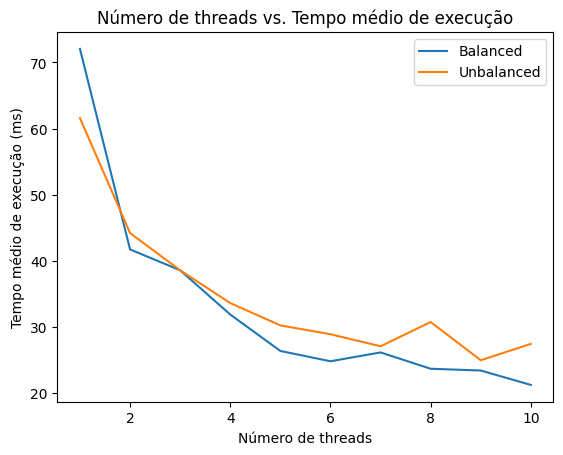

In [5]:
import numpy as np
import matplotlib.pyplot as plt

balanced = np.loadtxt(open("balanced.csv", "rb"), delimiter=",", skiprows=1)
unbalanced = np.loadtxt(open("unbalanced.csv", "rb"), delimiter=",", skiprows=1)

balanced_mean = np.mean(balanced, axis=0)
unbalanced_mean = np.mean(unbalanced, axis=0)

plt.title("Número de threads vs. Tempo médio de execução")
plt.xlabel("Número de threads")
plt.ylabel("Tempo médio de execução (ms)")
plt.plot(np.linspace(1, 10, 10), balanced_mean, label="Balanced")
plt.plot(np.linspace(1, 10, 10), unbalanced_mean, label="Unbalanced")
plt.legend()
plt.show()